# 네트워크

<div class="guide-section-description">
      <h6 class="guide-section-title">문제 설명</h6>
      <div class="markdown solarized-dark"><p>네트워크란 컴퓨터 상호 간에 정보를 교환할 수 있도록 연결된 형태를 의미합니다. 예를 들어, 컴퓨터 A와 컴퓨터 B가 직접적으로 연결되어있고, 컴퓨터 B와 컴퓨터 C가 직접적으로 연결되어 있을 때 컴퓨터 A와 컴퓨터 C도 간접적으로 연결되어 정보를 교환할 수 있습니다. 따라서 컴퓨터 A, B, C는 모두 같은 네트워크 상에 있다고 할 수 있습니다.</p>

<p>컴퓨터의 개수 n, 연결에 대한 정보가 담긴 2차원 배열 computers가 매개변수로 주어질 때, 네트워크의 개수를 return 하도록 solution 함수를 작성하시오.</p>

<h5>제한사항</h5>

<ul>
<li>컴퓨터의 개수 n은 1 이상 200 이하인 자연수입니다.</li>
<li>각 컴퓨터는 0부터 <code>n-1</code>인 정수로 표현합니다.</li>
<li>i번 컴퓨터와 j번 컴퓨터가 연결되어 있으면 computers[i][j]를 1로 표현합니다.</li>
<li>computer[i][i]는 항상 1입니다.</li>
</ul>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>n</th>
<th>computers</th>
<th>return</th>
</tr>
</thead>
        <tbody><tr>
<td>3</td>
<td>[[1, 1, 0], [1, 1, 0], [0, 0, 1]]</td>
<td>2</td>
</tr>
<tr>
<td>3</td>
<td>[[1, 1, 0], [1, 1, 1], [0, 1, 1]]</td>
<td>1</td>
</tr>
</tbody>
      </table>
<h5>입출력 예 설명</h5>

<p>예제 #1<br>
아래와 같이 2개의 네트워크가 있습니다.<br>
  <img src="https://grepp-programmers.s3.amazonaws.com/files/ybm/5b61d6ca97/cc1e7816-b6d7-4649-98e0-e95ea2007fd7.png" title="" alt="image0.png"></p>

<p>예제 #2<br>
아래와 같이 1개의 네트워크가 있습니다.<br>
  <img src="https://grepp-programmers.s3.amazonaws.com/files/ybm/7554746da2/edb61632-59f4-4799-9154-de9ca98c9e55.png" title="" alt="image1.png"></p>
</div>
    </div>

In [61]:
'''
1. 리턴할 count와 방문기록 visted를 False로 초기화
2. 모든 노드를 순회하면서 방문한적이 없으면 dfs재귀로 돌림
    2-1. 현재 노드를 visited로 바꾸고, 다른 노드들과 연결되어있는지 확인
    2-2. 끊겨있는 노드에 dfs로 재귀
3. 재귀와 동시에 새로운 네트워크라는 뜻이니까 count += 1
'''

def solution(n, computers):
    def dfs(v, n):
        visited[v] = True
        
        for i in range(n):
            if computers[v][i] and not visited[i]:
                dfs(i, n)
    
    count = 0
    visited = [False] * n
    
    for i in range(n):
        if not visited[i]:
            dfs(i, n)
            count += 1
    
    return count

solution(n, computers)

1

# 최소 스패닝 트리

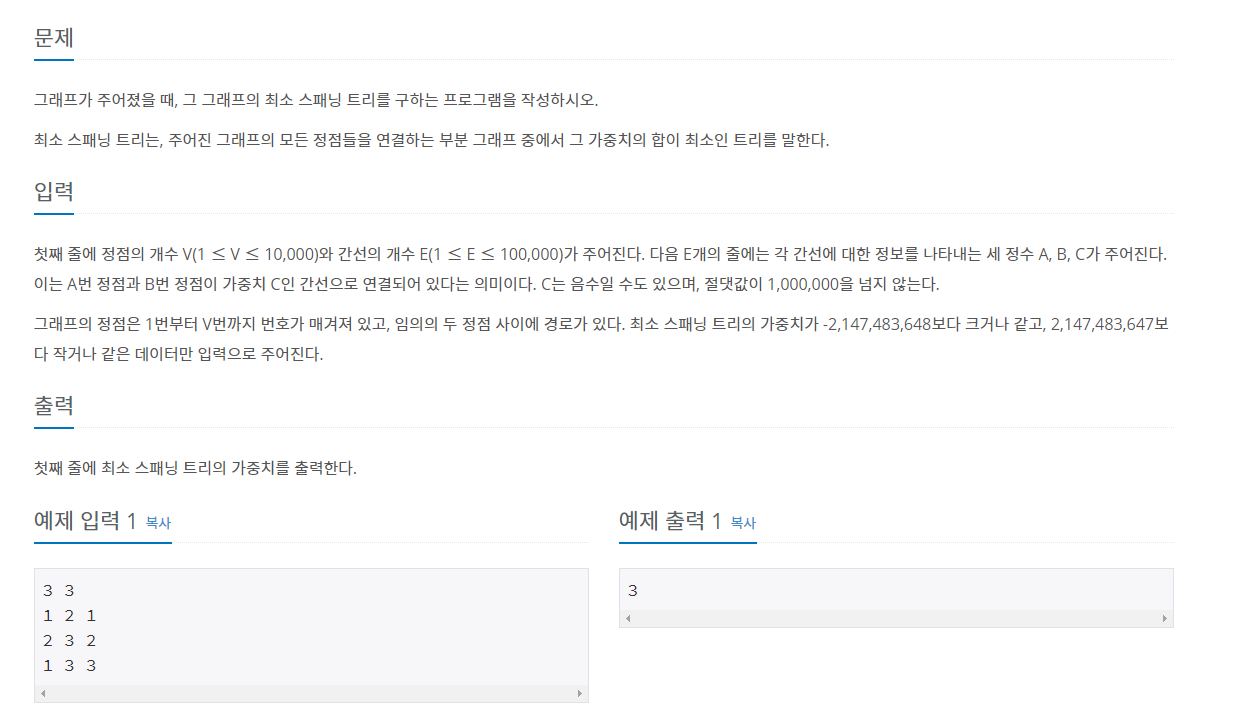

In [1]:
import sys
input = sys.stdin.readline

def find(x):
    if parent[x] == x:
        return x
    y = find(parent[x])
    parent[x] = y
    return y

def union(x,y):
    x = find(x)
    y = find(y)
    if x != y:
        parent[y] = x
 
V, E = map(int, input().split())
edge = []
parent = [i for i in range(V+1)]
 
for _ in range(E):
    start, end, cost = map(int, input().split())
    edge.append([cost,start,end])
 
 
edge.sort(key=lambda x: x[0])
answer = 0
count = 0

for i in range(E):
    cost = edge[i][0]
    start = edge[i][1]
    end = edge[i][2]
    if find(start) != find(end):
        union(start,end)
        answer += cost 
        count += 1
        
    if count == V-1:#모든 노드가 연결
        break
answer 

3

# 웜홀

In [6]:
import sys
input = sys.stdin.readline


def bellman_ford(): 
    for i in range(1, N + 1):  
        for start in range(1, N + 1):  
            for dest, cost in adj[start]:
                cur_cost = dist[start] + cost
                if dist[start] != sys.maxsize and dist[dest] > cur_cost:
                    dist[dest] = cur_cost
                    if i == N:
                        return False
                    
    return True

T = int(input())

for _ in range(T):
    N, M, W = map(int, input().split())
 
    dist = [sys.maxsize for _ in range(N + 1)]
    adj = [[] for _ in range(N + 1)]
 
    for _ in range(M):  # 도로 정보
        S, E, T = map(int, input().split())
 
        # 양방향 그래프이므로 S, E 각각 추가
        adj[S].append((E, T))
        adj[E].append((S, T))
    
    for _ in range(W):  # 웜홀 정보
        S, E, T = map(int, input().split())
 
        adj[S].append((E, -T)) 
    
    result = bellman_ford()
    
    if result:
        print('NO')
    else:
        print('YES')

NO
YES
